# Support Vector Machine (SVM)

#### Importing the libraries and loading the data

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [19]:
from sklearn.datasets import load_breast_cancer

In [20]:
raw_data = load_breast_cancer()

#### Since the loaded data are in dict format, we better convert it to pandas dataframe object

In [21]:
data.keys()

Index([u'mean radius', u'mean texture', u'mean perimeter', u'mean area',
       u'mean smoothness', u'mean compactness', u'mean concavity',
       u'mean concave points', u'mean symmetry', u'mean fractal dimension',
       u'radius error', u'texture error', u'perimeter error', u'area error',
       u'smoothness error', u'compactness error', u'concavity error',
       u'concave points error', u'symmetry error', u'fractal dimension error',
       u'worst radius', u'worst texture', u'worst perimeter', u'worst area',
       u'worst smoothness', u'worst compactness', u'worst concavity',
       u'worst concave points', u'worst symmetry', u'worst fractal dimension'],
      dtype='object')

In [6]:
print(raw_data['target_names'])

['malignant' 'benign']


In [22]:
print(raw_data['data'])

[[  1.79900000e+01   1.03800000e+01   1.22800000e+02 ...,   2.65400000e-01
    4.60100000e-01   1.18900000e-01]
 [  2.05700000e+01   1.77700000e+01   1.32900000e+02 ...,   1.86000000e-01
    2.75000000e-01   8.90200000e-02]
 [  1.96900000e+01   2.12500000e+01   1.30000000e+02 ...,   2.43000000e-01
    3.61300000e-01   8.75800000e-02]
 ..., 
 [  1.66000000e+01   2.80800000e+01   1.08300000e+02 ...,   1.41800000e-01
    2.21800000e-01   7.82000000e-02]
 [  2.06000000e+01   2.93300000e+01   1.40100000e+02 ...,   2.65000000e-01
    4.08700000e-01   1.24000000e-01]
 [  7.76000000e+00   2.45400000e+01   4.79200000e+01 ...,   0.00000000e+00
    2.87100000e-01   7.03900000e-02]]


In [23]:
print (raw_data['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [24]:
print(raw_data['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [11]:
print(raw_data['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [25]:
data = pd.DataFrame(raw_data['data'],columns =raw_data['feature_names'])
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [16]:
sns.pairplot(raw_data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


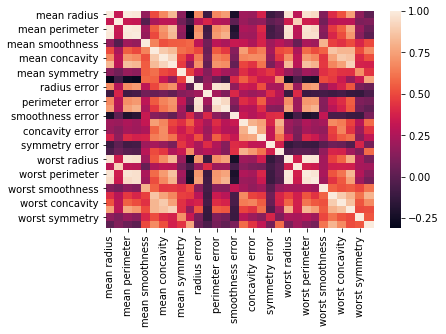

In [17]:
sns.heatmap(raw_data.corr())

#### Assigning dataset to X and y

In [28]:
X =data
y =pd.DataFrame(raw_data['target'])
y.head()

,0
0,0
1,0
2,0
3,0
4,0


#### Splitting the data

In [30]:
X_train,X_test, y_train,y_test = train_test_split(X, np.ravel(y),random_state=100,test_size=0.3)

#### Training the model

In [31]:
SVM = SVC()

In [32]:
SVM.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Prediction

In [33]:
prediction = SVM.predict(X_test)

#### Evaluating the model

In [34]:
print (classification_report(y_test, prediction))
print (confusion_matrix(y_test,prediction))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        69
          1       0.60      1.00      0.75       102

avg / total       0.36      0.60      0.45       171

[[  0  69]
 [  0 102]]


/home/pushparaja/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## GRID SEARCH

In [35]:
params = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.001,0.0001,0.00001], 'kernel':['rbf']}

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
grid = GridSearchCV(SVC(),params,refit =3, verbose =3)

In [38]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] kernel=rbf, C=0.1, gamma=1 ......................................
[CV] . kernel=rbf, C=0.1, gamma=1, score=0.639097744361, total=   0.1s
[CV] kernel=rbf, C=0.1, gamma=1 ......................................
[CV] . kernel=rbf, C=0.1, gamma=1, score=0.639097744361, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=1 ......................................
[CV] . kernel=rbf, C=0.1, gamma=1, score=0.643939393939, total=   0.0s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s



[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV]  kernel=rbf, C=0.1, gamma=0.1, score=0.639097744361, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV]  kernel=rbf, C=0.1, gamma=0.1, score=0.639097744361, total=   0.1s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV]  kernel=rbf, C=0.1, gamma=0.1, score=0.643939393939, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.001 ..................................
[CV]  kernel=rbf, C=0.1, gamma=0.001, score=0.639097744361, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.001 ..................................
[CV]  kernel=rbf, C=0.1, gamma=0.001, score=0.639097744361, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.001 ..................................
[CV]  kernel=rbf, C=0.1, gamma=0.001, score=0.643939393939, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.0001 .................................
[CV]  kernel=rbf, C=0.1, gamma=0.0001, score=0.917293233083, tot

[CV] kernel=rbf, C=1000, gamma=0.001 .................................
[CV]  kernel=rbf, C=1000, gamma=0.001, score=0.864661654135, total=   0.0s
[CV] kernel=rbf, C=1000, gamma=0.001 .................................
[CV]  kernel=rbf, C=1000, gamma=0.001, score=0.924242424242, total=   0.0s
[CV] kernel=rbf, C=1000, gamma=0.0001 ................................
[CV]  kernel=rbf, C=1000, gamma=0.0001, score=0.924812030075, total=   0.0s
[CV] kernel=rbf, C=1000, gamma=0.0001 ................................
[CV]  kernel=rbf, C=1000, gamma=0.0001, score=0.90977443609, total=   0.0s
[CV] kernel=rbf, C=1000, gamma=0.0001 ................................
[CV]  kernel=rbf, C=1000, gamma=0.0001, score=0.893939393939, total=   0.0s
[CV] kernel=rbf, C=1000, gamma=1e-05 .................................
[CV]  kernel=rbf, C=1000, gamma=1e-05, score=0.954887218045, total=   0.0s
[CV] kernel=rbf, C=1000, gamma=1e-05 .................................
[CV]  kernel=rbf, C=1000, gamma=1e-05, score=0.9398

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    3.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.001, 0.0001, 1e-05]},
       pre_dispatch='2*n_jobs', refit=3, return_train_score=True,
       scoring=None, verbose=3)

In [39]:
grid.best_params_

{'C': 1000, 'gamma': 1e-05, 'kernel': 'rbf'}

In [40]:
grid_prediction = grid.predict(X_test)

In [41]:
print (classification_report(y_test, grid_prediction))
print (confusion_matrix(y_test,grid_prediction))

             precision    recall  f1-score   support

          0       0.96      0.93      0.94        69
          1       0.95      0.97      0.96       102

avg / total       0.95      0.95      0.95       171

[[64  5]
 [ 3 99]]
